In [8]:
# Data preparation for Ph.D thesis
# @author: Andres L. Suarez-Cetrulo
%config IPCompleter.greedy=True
%load_ext jupyternotify
%matplotlib inline

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


In [9]:
# Imports
import pandas as pd
import numpy as np
import datetime
from pathlib import Path
import os

# Using TALib abstract API to create a dictionary of technical indicators to iterate later.
from talib import abstract

In [10]:
# Creating a dictionary of technical indicators using TALib abstract API
indicator = {'sma': abstract.Function('sma'), 
             'ema': abstract.Function('ema'), 
             'wma': abstract.Function('wma'), 
             'mom': abstract.Function('mom'), 
             'stoch': abstract.Function('stoch'), 
             'macd': abstract.Function('macd'), 
             'rsi': abstract.Function('rsi'), 
             'willr': abstract.Function('willr'), 
             'adosc': abstract.Function('adosc'), 
             'cci': abstract.Function('cci'), 
             'adx': abstract.Function('adx'), 
             'aroon': abstract.Function('aroon'), 
             'bbands': abstract.Function('bbands'), 
             'obv': abstract.Function('obv'), 
             'trima': abstract.Function('trima'), 
             'roc': abstract.Function('roc'), 
             'rocr': abstract.Function('rocr'), 
             'stochf': abstract.Function('stochf'), 
             'medprice': abstract.Function('medprice'), 
             'typprice': abstract.Function('typprice'), 
             'wclprice': abstract.Function('wclprice'), 
             'atr': abstract.Function('atr'), 
             'macdfix': abstract.Function('macdfix'), 
             'mfi': abstract.Function('mfi'), 
             'sar': abstract.Function('sar'), 
             'ppo': abstract.Function('ppo')}
# Add as many indicators as necessary: see all indicators in https://mrjbq7.github.io/ta-lib/

In [34]:
# Paths
# Paths for symbols (not eft)
DATA_PATH=os.sep.join(['C:','Users','suare','PycharmProjects','RegimeSwitchingSeriesGenerator','output'])
# '/Users/asuarez/Downloads'
SOURCE_PATH=DATA_PATH # +'raw\\alpha_vantage\\S&P500\\symbols\\AAPL\\'  # 'raw/alpha_vantage/'
RESULT_PATH=DATA_PATH # +'analysis\\'+SYMBOL.lower()+'\\'

# List of dates for files to be loaded
filename = 'timeseries_created_21-10-2019' # 'timeseries_created_1571527428'
FIELD = 'ts' # price->'ts' returns->'ret_ts' ts_with_added_noise-> 'ts_n2_post'

file = os.sep.join([SOURCE_PATH, filename+'.csv'])
RESULT_FILEPATH_PROCESSED = os.sep.join([RESULT_PATH, filename+'_indicators.csv'])

In [35]:
# Open file
df=pd.read_csv(file)
df['close'] = df[FIELD]
df.close.head()

0    227.568004
1    227.616017
2    227.664041
3    227.712075
4    227.724803
Name: close, dtype: float64

In [36]:
#Add parameters to transform in TS
timeseries=['close']
#Length of the TS. How many values do we keep per serie. 
# e.g. 1 -> t / 2 -> t,t-1 / 3 -> t,t-1,t-2 / 4 -> t,t-1,t-2,t-3
length = 5

# Add lagged times
for column in timeseries:
    #df[column+'_t']=df[column]
    for i in range(1,length):
        df[column+'_t-'+str(i)]=df[column].shift(i) #it could also be sorted and group by if needed
    #del drops the delected df column
    #del df[column]

In [37]:
# all the numbers here and below assume a default time period for ta params of 10 mins averages
# change the other numbers (params of 5min and 20min and theremoval of 20 first mins of the day below) if the mins number is changed.
# in that case change as well the time tag '_10' with the corresponding one.
default_timerange=10
# Set extra timeranges for moving averages
extra_timeranges=[default_timerange/2, default_timerange, default_timerange*2, default_timerange*3]

# ###########################################
# Iterate and run list of indicators selected
# All of them produced for 25 prior mins of data 
# ###########################################
for key in list(indicator.keys()):
    if key not in ['stoch', 'macd', 'willr', 'adosc', 'cci', 'adx', 
                   'aroon', 'bbands', 'obv', 'stochf', 'medprice',
                   'typprice', 'wclprice', 'atr', 'macdfix', 'mfi',
                   'sar']:  # avoiding indicators that need more than 1 series (more than close: ex: high/low)
        # For indicators that only return one column (this will need to be modified depending on the selection of indicators)
        if key in ['ema','sma','wma','trima']: # ,'macdfix']:
            for timerange in extra_timeranges:
                df[key+'_'+str(timerange)]=indicator[key](df, timeperiod=timerange) 
        elif key not in ['bbands','aroon','stoch','macd','macdfix','stochf']:
            df[key+'_'+str(default_timerange)]=indicator[key](df, timeperiod=(default_timerange))
        # Otherwise check the list of columns and return all
        else: 
            key_output=indicator[key](df, timeperiod=(default_timerange)) #, price='close')
            for j in range(0,len(list(key_output.columns))):
                df[key+'_'+key_output.columns[j]]=key_output[[j]]

df.head()

,n_row,new_switch,cur_switch,current_model_id,new_model_id,weights,ts,ts_mult,ret_ts,ts_n1_pre,...,wma_30,mom_10,rsi_10,trima_5.0,trima_10,trima_20,trima_30,roc_10,rocr_10,ppo_10
0,0,NONE,NONE,1,-1,"(1, 0)",227.568004,227.760120,0.000211,227.565121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NONE,NONE,1,-1,"(1, 0)",227.616017,228.000493,0.000211,227.614760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NONE,NONE,1,-1,"(1, 0)",227.664041,228.241119,0.000211,227.661036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NONE,NONE,1,-1,"(1, 0)",227.712075,228.482000,0.000211,227.707352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NONE,NONE,1,-1,"(1, 0)",227.724803,228.545860,0.000056,227.721379,...,NaN,NaN,NaN,227.660124,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
def set_label(row):
    if row['close_t+1'] > row['close']: return 1
    else: return 0

# One minute ahead closing price
df['close_t+1']=df['close'].shift(-1)

# Creating label/y to be predicted / independent (predicted) feature 'y' 
df['label'] = df.apply(set_label, axis=1)
df.drop(columns=['n_row', 'new_switch', 'cur_switch', 'current_model_id', 'new_model_id', 
                 'weights', 'ts', 'ret_ts', 'ts_n1_pre', 'ts_n2_pre', 'ts_n1_post', 'ts_n2_post'], inplace=True)
df.dropna(inplace=True)
df.head()

,ts_mult,close,close_t-1,close_t-2,close_t-3,close_t-4,sma_5.0,sma_10,sma_20,sma_30,...,rsi_10,trima_5.0,trima_10,trima_20,trima_30,roc_10,rocr_10,ppo_10,close_t+1,label
29,230.621198,228.136885,228.118771,228.103652,228.089323,228.072328,228.104192,228.062920,227.980427,227.892174,...,100.0,228.104040,228.062920,227.980478,227.896883,0.072997,1.000730,0.050561,228.155411,1
30,230.714852,228.155411,228.136885,228.118771,228.103652,228.089323,228.120809,228.079568,227.997078,227.911754,...,100.0,228.120236,228.079447,227.996990,227.914111,0.073022,1.000730,0.050624,228.171102,1
31,230.794196,228.171102,228.155411,228.136885,228.118771,228.103652,228.137164,228.095972,228.013581,227.930257,...,100.0,228.137086,228.095920,228.013479,227.930960,0.071947,1.000719,0.050675,228.185242,1
32,230.865718,228.185242,228.171102,228.155411,228.136885,228.118771,228.153482,228.112273,228.029908,227.947630,...,100.0,228.154025,228.112370,228.029942,227.947544,0.071489,1.000715,0.050635,228.201604,1
33,230.948501,228.201604,228.185242,228.171102,228.155411,228.136885,228.170049,228.128780,228.046317,227.963948,...,100.0,228.170345,228.128868,228.046418,227.964004,0.072384,1.000724,0.050565,228.220416,1


In [39]:
# Select columns for output
columns_selected=[
                 'rsi_10' ,'mom_10','ema_10','ema_20','ema_30',
                 'sma_10','sma_20','sma_30','wma_10','wma_20','wma_30',
                 'trima_10','trima_20','trima_30',
                 'roc_10','rocr_10','ppo_10',
                 'close','close_t-1','close_t-2','close_t-3','close_t-4',
                 'label']

# Export processed data
output = pd.DataFrame(df, columns=columns_selected)
output.to_csv(RESULT_FILEPATH_PROCESSED, sep=';', encoding='utf-8', index = False)

# Printing classes distributions
print("Class distribution: ")
label_zero=len(df[df['label'] == 0])
label_one=len(df[df['label'] == 1])
#print(label_zero)
#print(label_one)
print("0 in "+str(float(label_zero)/(label_one+label_zero))+"%")
print("1 in "+str(float(label_one)/(label_one+label_zero))+"%")

%notify -m "Parsing is finished"

Class distribution: 
0 in 0.5030181086519114%
1 in 0.4969818913480885%


<IPython.core.display.Javascript object>

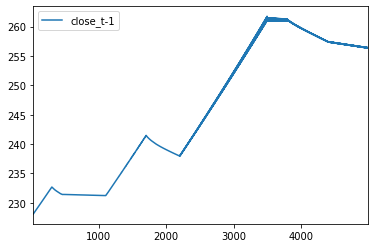

In [40]:
# Now plot close price and volume overtime.
import matplotlib.pyplot as plt
import pandas as pd

df.plot(y=["close_t-1"])
plt.show()